<a href="https://colab.research.google.com/github/aziz0519/Python-Programs/blob/master/Text_analytics_of_blockchain_whitepapers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#mount drive

from google.colab import drive
from google.colab import files 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#import libraries

import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#load data
data = pd.read_json(r"/content/drive/My Drive/df.json",orient='colunms')
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1


In [0]:
data.shape

(884, 10)

In [0]:
def tsplit(s,sep):
  stack = [s]
  for char in sep:
    pieces = []
    for substr in stack:
      pieces.extend(substr.split(char))
      stack = pieces
  return stack

first_text = data['text'][0]
first_text

'The 0Chain Consensus Protocol\n\nJonathan Katz1(cid:63), Thomas Austin2, Siva Dirisala3, and Saswata Basu3\n\n1 Dept. of Computer Science, University of Maryland.\n\n2 0Chain LLC and San Jose State University.\n\n3 0Chain LLC.\n\nAbstract. We describe the 0Chain blockchain ecosystem, including a\nnew consensus protocol oﬀering fast ﬁnality. We provide proofs of security\nfor the protocol, along with experiment results validating its eﬃciency\nunder realistic network conditions.\n\n1\n\nIntroduction\n\nSince the advent of Bitcoin [Nak09], the blockchain has revolutionized the world\nof cryptocurrencies and distributed computation. Ethereum [Woo14] further de-\nveloped this promise by integrating Turing-complete smart contracts into the\nblockchain for building distributed applications (dApps).\n\nDespite the promise of blockchain protocols, they have been held back by\ntheir slow consensus times. For example, in Bitcoin a transaction is not con-\nsidered ﬁnalized until it is six blocks

In [0]:
clean_text = []
clean_text_length = []

for text in data['text']:
  split_text = tsplit(text, (" ","\n","-\n","\t","\r","\u2000","\u200b","cid:","\xa0","\x0c", "(", ")"))
  split_text = [i for i in split_text if i != '']
  clean_text.append(split_text)
  clean_text_length.append(len(split_text))
  
len(clean_text)

884

In [0]:
data['clean_text'] = clean_text
data['clean_text_length'] = clean_text_length
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409


In [0]:
print(data['clean_text'][0])

['The', '0Chain', 'Consensus', 'Protocol', 'Jonathan', 'Katz1', '63', ',', 'Thomas', 'Austin2,', 'Siva', 'Dirisala3,', 'and', 'Saswata', 'Basu3', '1', 'Dept.', 'of', 'Computer', 'Science,', 'University', 'of', 'Maryland.', '2', '0Chain', 'LLC', 'and', 'San', 'Jose', 'State', 'University.', '3', '0Chain', 'LLC.', 'Abstract.', 'We', 'describe', 'the', '0Chain', 'blockchain', 'ecosystem,', 'including', 'a', 'new', 'consensus', 'protocol', 'oﬀering', 'fast', 'ﬁnality.', 'We', 'provide', 'proofs', 'of', 'security', 'for', 'the', 'protocol,', 'along', 'with', 'experiment', 'results', 'validating', 'its', 'eﬃciency', 'under', 'realistic', 'network', 'conditions.', '1', 'Introduction', 'Since', 'the', 'advent', 'of', 'Bitcoin', '[Nak09],', 'the', 'blockchain', 'has', 'revolutionized', 'the', 'world', 'of', 'cryptocurrencies', 'and', 'distributed', 'computation.', 'Ethereum', '[Woo14]', 'further', 'de-', 'veloped', 'this', 'promise', 'by', 'integrating', 'Turing-complete', 'smart', 'contracts',

In [0]:
!pip install textstat

     |████████████████████████████████| 3.0MB 7.4MB/s 


In [0]:
import textstat
from itertools import groupby
from string import punctuation

In [0]:
def retrieve_str(x):
  if len(x) == 0:
    return ''
  else:
    return ' '.join(x)
  
#Clean text and remove punctuation

def remove_dup_punc(x):
  new_text = []
  for k,g in groupby(x):
    if k in set(punctuation):
      new_text.append(k)
    else:
      new_text.extend(g)
  return ' '.join(new_text)

#create new column
data = data.sort_index()
data['clean_text2'] = data['clean_text'].apply(remove_dup_punc)


data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...


In [0]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
def preprocess(text):
  text = text.lower()
  text = re.sub('[^a-zA-Z]+',' ',text)
  words = text.split()
  wnl = WordNetLemmatizer()
  words2 = [wnl.lemmatize(word) for word in words if not word in set(stopwords.words('english'))]
  words3 = ' '.join(words2)
  return words3

In [0]:
data['clean_text3'] = data['clean_text2'].astype(str).apply(preprocess)

In [0]:
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...


In [0]:
data['clean_text3'][10]

'v table content abstract aced ace dividend token context prelude platform identity chance game suite derivative market future iteration state channel implementation us potential casual gambling derivative user experience flip design issue front end back end avoiding manipulation roadmap marketing aced token crowdsale sale detail crowdsale date information token rate distribution allocation team disclaimer mention thanks reference page abstract etherace decentralized asset speculation betting platform based smart contract state channel blockchain technology provide different market instrument type user trader gambler benefit etherace platform built layer top ethereum enables bet placed value stored secure decentralized transaction ledger allows level enhanced transparency security lower fee intermediary required traditional online betting speculation platform cannot match platform logic handled autonomous open source smart contract creating trustless environment governing body three hi

In [0]:
from wordcloud import WordCloud

In [0]:
long_string = ",".join(list(data['clean_text3'].values))

print(len(long_string))

27098530


In [0]:
from wordcloud import STOPWORDS, ImageColorGenerator

In [0]:
stopwords  = set(STOPWORDS)
stopwords.update(["well","time","data","one","make","new","token","provide","whitepaper","white"])

In [0]:
wordcloud = WordCloud(width = 400, height = 300, background_color = "white", max_words = 500, contour_width = 3 , contour_color= 'steelblue', stopwords = stopwords).generate(long_string) 

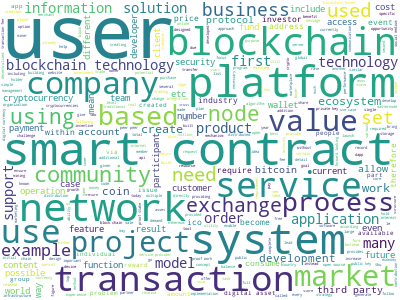

In [0]:
wordcloud.to_image()

In [0]:
list_words = []
list_words_length = []

for i in range(len(data)):
  split_text = data['clean_text3'][i].split()
  list_words.append(split_text)
  list_words_length.append(len(split_text))

len(list_words)

884

In [0]:
data['text_corpus'] = list_words
data['text_corpus_length'] = list_words_length
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3,text_corpus,text_corpus_length
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...,"[chain, consensus, protocol, jonathan, katz, t...",2232
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...,"[x, open, protocol, decentralized, exchange, e...",3036
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...,"[xcert, protocol, whitepaper, author, kristija...",8034
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...,"[general, information, whitepaper, july, intro...",760
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...,"[legal, disclaimer, purpose, white, paper, pre...",6470


(array([577., 256.,  40.,   7.,   2.,   1.,   0.,   0.,   0.,   1.]),
 array([    0. ,  7983.5, 15967. , 23950.5, 31934. , 39917.5, 47901. ,
        55884.5, 63868. , 71851.5, 79835. ]),
 <a list of 10 Patch objects>)

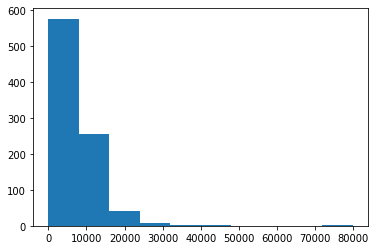

In [0]:
plt.hist(data['clean_text_length'])

(array([253., 281., 181.,  93.,  47.,  14.,   8.,   3.,   2.,   2.]),
 array([    0. ,  2140.7,  4281.4,  6422.1,  8562.8, 10703.5, 12844.2,
        14984.9, 17125.6, 19266.3, 21407. ]),
 <a list of 10 Patch objects>)

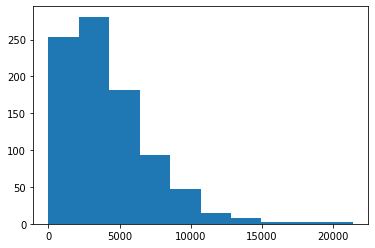

In [0]:
plt.hist(data['text_corpus_length'])

In [0]:
hasGithub = []

for cleaned_list in data['text_corpus']:
  if 'github' in [word.lower() for word in cleaned_list]:
    hasGithub.append(1)
  else:
    hasGithub.append(0)

In [0]:
hasBitcoin = []

for cleaned_list in data['text_corpus']:
  if 'bitcoin' in [word.lower() for word in cleaned_list]:
    hasBitcoin.append(1)
  else:
    hasBitcoin.append(0)

In [0]:
hasLinkedIn = []

for cleaned_list in data['text_corpus']:
  if 'linkedin' in [word.lower() for word in cleaned_list]:
    hasLinkedIn.append(1)
  else:
    hasLinkedIn.append(0)

In [0]:
hasTeamInfo = []

for cleaned_list in data['text_corpus']:
  if 'team' in [word.lower() for word in cleaned_list]:
    hasTeamInfo.append(1)
  else:
    hasTeamInfo.append(0)

In [0]:
hasBlockchain = []

for cleaned_list in data['text_corpus']:
  if 'blockchain' in [word.lower() for word in cleaned_list]:
    hasBlockchain.append(1)
  else:
    hasBlockchain.append(0)

In [0]:
hasToken = []

for cleaned_list in data['text_corpus']:
  if 'token' in [word.lower() for word in cleaned_list]:
    hasToken.append(1)
  else:
    hasToken.append(0)

In [0]:
hasContract = []

for cleaned_list in data['text_corpus']:
  if 'smart' and 'contract' in [word.lower() for word in cleaned_list]:
    hasContract.append(1)
  else:
    hasContract.append(0)

In [0]:
hasUser = []

for cleaned_list in data['text_corpus']:
  if 'user' in [word.lower() for word in cleaned_list]:
    hasUser.append(1)
  else:
    hasUser.append(0)

In [0]:
data['hasGithub'] = hasGithub
data['hasLinkedIn'] = hasLinkedIn
data['hasBitcoin'] = hasBitcoin
data['hasTeamInfo'] = hasTeamInfo
data['hasBlockchain'] = hasBlockchain
data['hasToken'] = hasToken
data['hasContract'] = hasContract
data['hasUser'] = hasUser
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3,text_corpus,text_corpus_length,hasGithub,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasToken,hasContract,hasUser
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,0,1,0,1,1,1,0
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...,"[x, open, protocol, decentralized, exchange, e...",3036,1,0,0,0,1,1,1,1
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,1,1,1
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...,"[general, information, whitepaper, july, intro...",760,0,0,0,1,1,1,0,0
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,0,1,1,1,1,1,1


In [0]:
data['hasContract'].value_counts()

1    676
0    208
Name: hasContract, dtype: int64

In [0]:
data['hasUser'].value_counts()

1    793
0     91
Name: hasUser, dtype: int64

In [0]:
import datetime

In [0]:
day_diff = []

for num in range(len(data)):
  date_start = data['first_date'][num]
  date_start_formatted = datetime.datetime.strptime(date_start, "%d/%m/%Y")
  date_end = data['latest_date [9/9/19]'][num]
  date_end_formatted = datetime.datetime.strptime(date_end, "%d/%m/%Y")
  days_diff = date_end_formatted - date_start_formatted
  day_diff.append(days_diff.days)
  
  
len(day_diff)  

884

In [0]:
data['day_diff'] = day_diff
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3,text_corpus,text_corpus_length,hasGithub,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasToken,hasContract,hasUser,day_diff
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,0,1,0,1,1,1,0,417
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...,"[x, open, protocol, decentralized, exchange, e...",3036,1,0,0,0,1,1,1,1,692
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,1,1,1,424
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...,"[general, information, whitepaper, july, intro...",760,0,0,0,1,1,1,0,0,193
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,0,1,1,1,1,1,1,535


In [0]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('coolwarm')

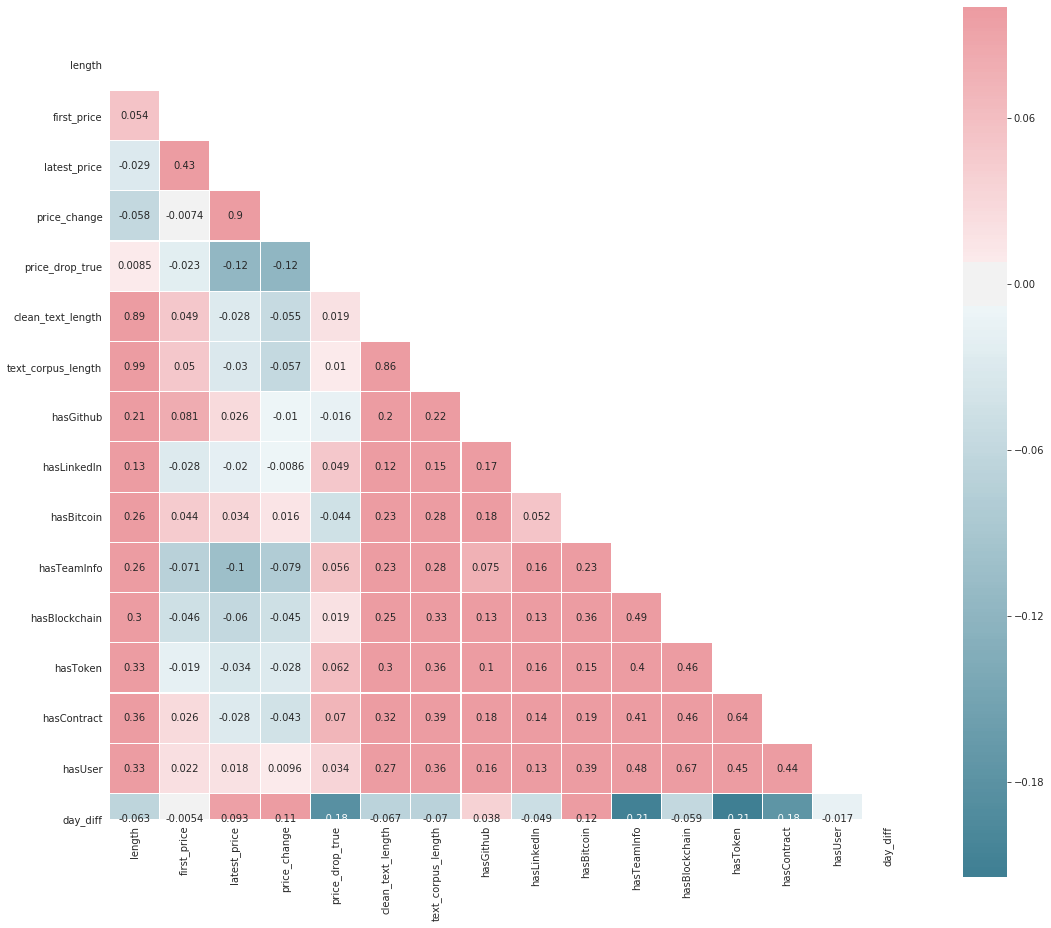

In [0]:
corr = data.corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize =(18,16))

cmap = sns.diverging_palette(220,10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap , vmax = .1 ,center =0, square=True, annot = True, linewidth = .1)


In [0]:
from textblob import TextBlob

In [0]:
#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
#Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. 
#Subjectivity is also a float which lies in the range of [0,1]

def polarity(x):
  return TextBlob(x).sentiment.polarity

In [0]:
data['polarity_scores'] = data['clean_text3'].apply(polarity)
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3,text_corpus,text_corpus_length,hasGithub,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasToken,hasContract,hasUser,day_diff,polarity_scores
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,0,1,0,1,1,1,0,417,0.035793
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...,"[x, open, protocol, decentralized, exchange, e...",3036,1,0,0,0,1,1,1,1,692,0.076354
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,1,1,1,424,0.114156
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...,"[general, information, whitepaper, july, intro...",760,0,0,0,1,1,1,0,0,193,0.117475
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,0,1,1,1,1,1,1,535,0.122624


In [0]:
data['polarity_scores'].describe()

count    884.000000
mean       0.094498
std        0.048379
min       -0.030519
25%        0.073404
50%        0.097041
75%        0.115886
max        0.666667
Name: polarity_scores, dtype: float64

In [0]:
def subjectivity(x):
  return TextBlob(x).sentiment.subjectivity

In [0]:
data['subjectivity_scores'] = data['clean_text3'].apply(subjectivity)
data.head()

,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3,text_corpus,text_corpus_length,hasGithub,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasToken,hasContract,hasUser,day_diff,polarity_scores,subjectivity_scores
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,0,1,0,1,1,1,0,417,0.035793,0.483881
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...,"[x, open, protocol, decentralized, exchange, e...",3036,1,0,0,0,1,1,1,1,692,0.076354,0.443694
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,1,1,1,424,0.114156,0.429502
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...,"[general, information, whitepaper, july, intro...",760,0,0,0,1,1,1,0,0,193,0.117475,0.358987
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,0,1,1,1,1,1,1,535,0.122624,0.383026


In [0]:
data['subjectivity_scores'].describe()

count    884.000000
mean       0.396199
std        0.104068
min        0.000000
25%        0.383023
50%        0.416171
75%        0.443465
max        0.786243
Name: subjectivity_scores, dtype: float64

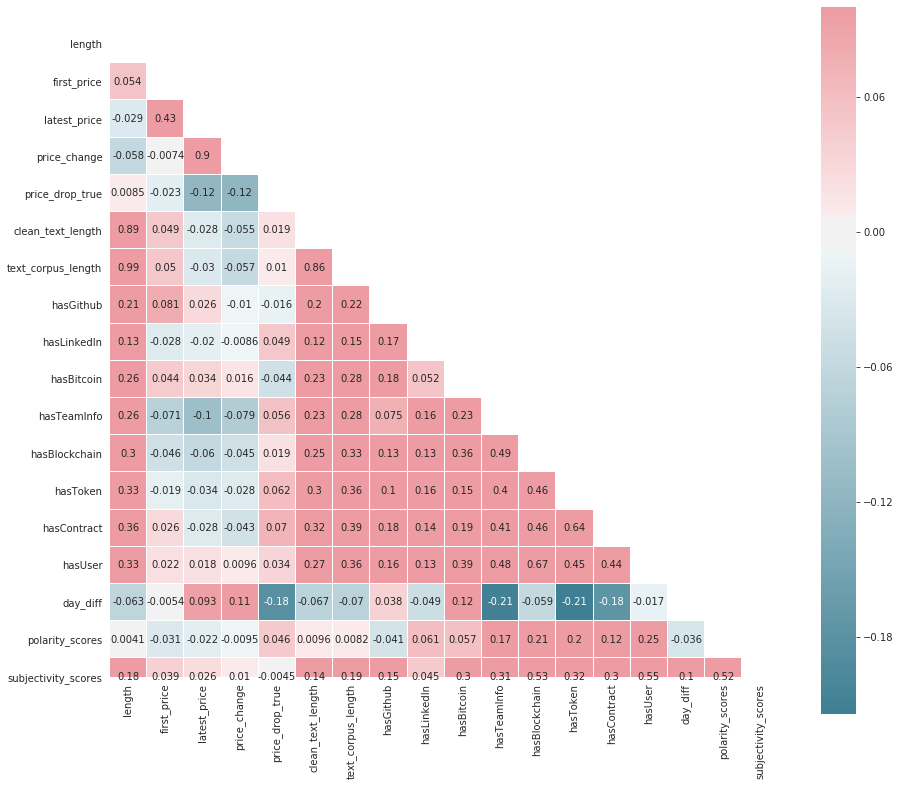

In [0]:
corr = data.corr()

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize =(15,13))

cmap = sns.diverging_palette(220,10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap , vmax = .1 ,center =0, square=True, annot = True, linewidth = .1)

In [0]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw

In [0]:
stopwords_cv = ['blockchain','user','data','time','use','block','chain'] + list(esw)

In [0]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='GnBu_d')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [0]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words= stopwords_cv)

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data['clean_text3'])

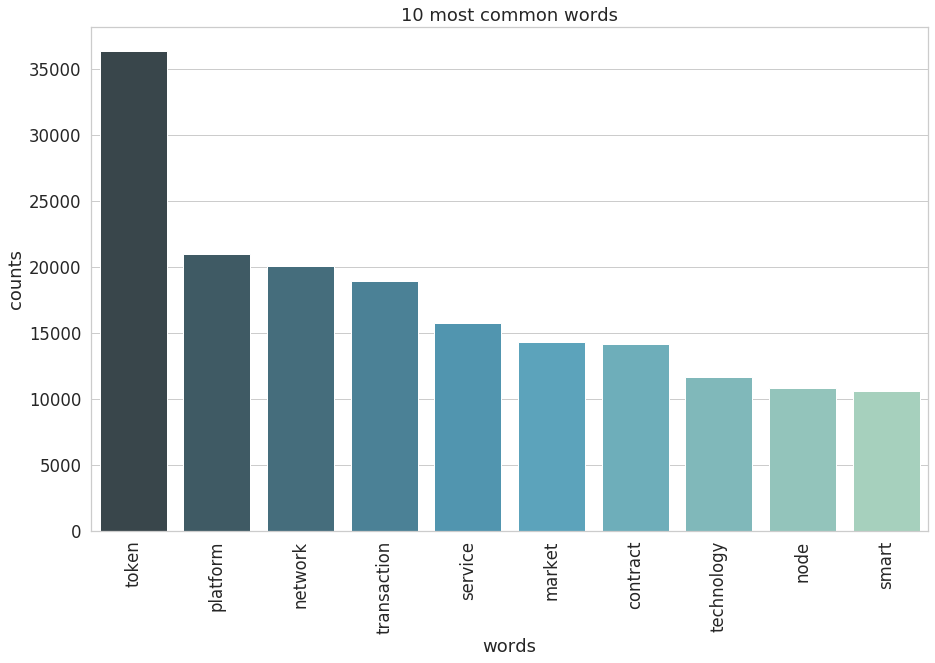

In [0]:
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [0]:
data['log_first_price'] = np.log(data['first_price'])
data['log_latest_price'] = np.log(data['latest_price'])
data['log_daysdiff'] = np.log(data['day_diff'])
data['log_clean_text1'] = np.log(data['clean_text_length'])
data['log_clean_text2'] = np.log(data['text_corpus_length'])
data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3,text_corpus,text_corpus_length,hasGithub,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasToken,hasContract,hasUser,day_diff,polarity_scores,subjectivity_scores,log_first_price,log_latest_price,log_daysdiff,log_clean_text1,log_clean_text2
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,0,1,0,1,1,1,0,417,0.035793,0.483881,-0.727066,-3.289430,6.033086,8.295049,7.710653
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...,"[x, open, protocol, decentralized, exchange, e...",3036,1,0,0,0,1,1,1,1,692,0.076354,0.443694,-1.510488,-1.821092,6.539586,8.573384,8.018296
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,1,1,1,424,0.114156,0.429502,-3.131852,-6.850425,6.049733,9.518193,8.991438
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...,"[general, information, whitepaper, july, intro...",760,0,0,0,1,1,1,0,0,193,0.117475,0.358987,1.747653,1.232813,5.262690,7.200425,6.633318
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,0,1,1,1,1,1,1,535,0.122624,0.383026,-1.257620,-3.879153,6.282267,9.250426,8.774931


In [0]:
data['log_polarity'] = np.log(data['polarity_scores'])
data['log_subjectivity'] = np.log(data['subjectivity_scores'])
data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,coin,text,length,coin_id,first_date,first_price,latest_date [9/9/19],latest_price,price_change,price_drop_true,clean_text,clean_text_length,clean_text2,clean_text3,text_corpus,text_corpus_length,hasGithub,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasToken,hasContract,hasUser,day_diff,polarity_scores,subjectivity_scores,log_first_price,log_latest_price,log_daysdiff,log_clean_text1,log_clean_text2,log_polarity,log_subjectivity
0,0chain,The 0Chain Consensus Protocol\n\nJonathan Katz...,3978,0chain,19/07/2018,0.483325,09/09/2019,0.037275,-0.446050,1,"[The, 0Chain, Consensus, Protocol, Jonathan, K...",4004,The 0Chain Consensus Protocol Jonathan Katz1 6...,chain consensus protocol jonathan katz thomas ...,"[chain, consensus, protocol, jonathan, katz, t...",2232,0,0,1,0,1,1,1,0,417,0.035793,0.483881,-0.727066,-3.289430,6.033086,8.295049,7.710653,-3.330013,-0.725916
1,0x,0x: An open protocol for decentralized exchang...,5269,0x,17/10/2017,0.220802,09/09/2019,0.161849,-0.058953,1,"[0x:, An, open, protocol, for, decentralized, ...",5289,0x: An open protocol for decentralized exchang...,x open protocol decentralized exchange ethereu...,"[x, open, protocol, decentralized, exchange, e...",3036,1,0,0,0,1,1,1,1,692,0.076354,0.443694,-1.510488,-1.821092,6.539586,8.573384,8.018296,-2.572376,-0.812619
2,0xcert,\n\n \n \n0xcert protocol \nWhitepaper 0.6 \n...,13563,0xcert,12/07/2018,0.043637,09/09/2019,0.001059,-0.042578,1,"[0xcert, protocol, Whitepaper, 0.6, Authors:, ...",13605,0xcert protocol Whitepaper 0.6 Authors: Kristi...,xcert protocol whitepaper author kristijan sed...,"[xcert, protocol, whitepaper, author, kristija...",8034,1,1,1,1,1,1,1,1,424,0.114156,0.429502,-3.131852,-6.850425,6.049733,9.518193,8.991438,-2.170190,-0.845130
3,1irstcoin,\n \n \n \n \n \n \n\n \n\n \n\n \n\n \n\n \n...,1340,1irstcoin,28/02/2019,5.741111,09/09/2019,3.430866,-2.310245,1,"[General, Information, -, Whitepaper, as, of, ...",1340,General Information - Whitepaper as of July 20...,general information whitepaper july introducti...,"[general, information, whitepaper, july, intro...",760,0,0,0,1,1,1,0,0,193,0.117475,0.358987,1.747653,1.232813,5.262690,7.200425,6.633318,-2.141529,-1.024469
4,1World,\n\n \n\n \n\n \n\nLegal​ ​Disclaimer \n\n \...,10449,1world,23/03/2018,0.284330,09/09/2019,0.020668,-0.263662,1,"[Legal, Disclaimer, The, purpose, of, this, Wh...",10409,Legal Disclaimer The purpose of this White Pap...,legal disclaimer purpose white paper present w...,"[legal, disclaimer, purpose, white, paper, pre...",6470,0,0,1,1,1,1,1,1,535,0.122624,0.383026,-1.257620,-3.879153,6.282267,9.250426,8.774931,-2.098633,-0.959652


In [0]:
data_v1 = data[['first_price','clean_text_length','text_corpus_length','hasGithub','hasLinkedIn','hasBitcoin','hasTeamInfo','hasBlockchain','hasToken','hasUser','hasContract','day_diff','log_first_price','log_daysdiff','log_clean_text1','log_clean_text2','price_drop_true','latest_price','polarity_scores']]

data_v1.head()

,first_price,clean_text_length,text_corpus_length,hasGithub,hasLinkedIn,hasBitcoin,hasTeamInfo,hasBlockchain,hasToken,hasUser,hasContract,day_diff,log_first_price,log_daysdiff,log_clean_text1,log_clean_text2,price_drop_true,latest_price,polarity_scores
0,0.483325,4004,2232,0,0,1,0,1,1,0,1,417,-0.727066,6.033086,8.295049,7.710653,1,0.037275,0.035793
1,0.220802,5289,3036,1,0,0,0,1,1,1,1,692,-1.510488,6.539586,8.573384,8.018296,1,0.161849,0.076354
2,0.043637,13605,8034,1,1,1,1,1,1,1,1,424,-3.131852,6.049733,9.518193,8.991438,1,0.001059,0.114156
3,5.741111,1340,760,0,0,0,1,1,1,0,0,193,1.747653,5.262690,7.200425,6.633318,1,3.430866,0.117475
4,0.284330,10409,6470,0,0,1,1,1,1,1,1,535,-1.257620,6.282267,9.250426,8.774931,1,0.020668,0.122624


In [0]:
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import f1_score, auc, roc_curve, roc_auc_score, classification_report, confusion_matrix

import random

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data['clean_text3'],data['price_drop_true'],random_state=0)

In [0]:
#Train and evaluate the model
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)
clfrNB = MultinomialNB(alpha = 0.1)
clfrNB.fit(X_train_vectorized, y_train)
y_pred = clfrNB.predict(vect.transform(X_test))
score = roc_auc_score(y_test, y_pred)

print(score)

0.5256410256410257


In [0]:
colnames = ['first_price','text_corpus_length','hasLinkedIn','hasTeamInfo','hasToken','hasContract','polarity_scores','day_diff','latest_price']

x = data_v1[colnames]

x.head()

,first_price,text_corpus_length,hasLinkedIn,hasTeamInfo,hasToken,hasContract,polarity_scores,day_diff,latest_price
0,0.483325,2232,0,0,1,1,0.035793,417,0.037275
1,0.220802,3036,0,0,1,1,0.076354,692,0.161849
2,0.043637,8034,1,1,1,1,0.114156,424,0.001059
3,5.741111,760,0,1,1,0,0.117475,193,3.430866
4,0.284330,6470,0,1,1,1,0.122624,535,0.020668


In [0]:
y = data_v1['price_drop_true']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: price_drop_true, dtype: int64

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 1, stratify =y)

In [0]:
#establish baseline

random_list = np.random.randint(2, size = len(y_test))

random_list

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1])

In [0]:
#establish baseline accuracy

print(f1_score(random_list,y_test))
print(confusion_matrix(random_list,y_test))

0.6857142857142856
[[16 65]
 [12 84]]


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf_pred = rf.predict(x_test)
rf_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1])

In [0]:
f1_score(rf_pred, y_test)

0.9470198675496688

In [0]:
confusion_matrix(rf_pred,y_test)

array([[ 18,   6],
       [ 10, 143]])

In [0]:
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69        24
           1       0.96      0.93      0.95       153

    accuracy                           0.91       177
   macro avg       0.80      0.84      0.82       177
weighted avg       0.92      0.91      0.91       177



In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
dt_pred = dt.predict(x_test)
dt_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1])

In [0]:
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

           0       0.54      0.47      0.50        32
           1       0.89      0.91      0.90       145

    accuracy                           0.83       177
   macro avg       0.71      0.69      0.70       177
weighted avg       0.82      0.83      0.83       177



In [0]:
from xgboost import XGBClassifier

In [0]:
 xgb = XGBClassifier()
 xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xgb_pred = xgb.predict(x_test)
xgb_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1])

In [0]:
print(classification_report(xgb_pred, y_test))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        22
           1       0.97      0.94      0.95       155

    accuracy                           0.92       177
   macro avg       0.81      0.88      0.84       177
weighted avg       0.93      0.92      0.92       177



In [0]:
xgb.feature_importances_

array([0.27612695, 0.06368564, 0.        , 0.        , 0.        ,
       0.        , 0.04663164, 0.34766114, 0.26589465], dtype=float32)

In [0]:
xgb_auc = roc_auc_score(y_test , xgb_pred)
print('AUC: %.3f' % xgb_auc)

AUC: 0.808


In [0]:
fpr, tpr , thresholds = roc_curve(y_test, xgb_pred)

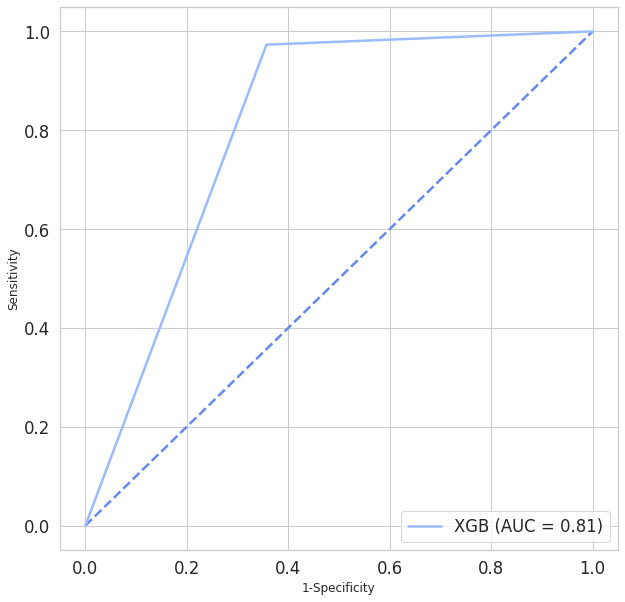

In [0]:
fpr, tpr , thresholds = roc_curve(y_test, xgb_pred)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr, label='XGB (AUC = %0.2f)'% xgb_auc)
plt.xlabel("1-Specificity",fontsize=12)
plt.ylabel("Sensitivity",fontsize=12)
plt.legend(loc='lower right')
plt.show()

In [0]:
#Gensim for topic modelling
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec, CoherenceModel, LdaModel, LsiModel
from pprint import pprint

In [0]:
model = Word2Vec(size = 100, window = 5, min_count = 200, sg =0)
model.build_vocab(list_words)

In [143]:
model.wv.vocab.keys()

dict_keys(['chain', 'consensus', 'protocol', 'computer', 'science', 'university', 'llc', 'state', 'abstract', 'describe', 'blockchain', 'ecosystem', 'including', 'new', 'fast', 'provide', 'proof', 'security', 'along', 'experiment', 'result', 'e', 'ciency', 'network', 'condition', 'introduction', 'since', 'bitcoin', 'world', 'cryptocurrencies', 'distributed', 'computation', 'ethereum', 'de', 'promise', 'integrating', 'turing', 'complete', 'smart', 'contract', 'building', 'application', 'dapps', 'despite', 'held', 'back', 'slow', 'time', 'example', 'transaction', 'con', 'six', 'block', 'deep', 'process', 'take', 'one', 'hour', 'address', 'limitation', 'introducing', 'algorithm', 'faster', 'us', 'via', 'veri', 'able', 'random', 'function', 'ranking', 'di', 'erent', 'pro', 'designer', 'also', 'introduce', 'concept', 'notary', 'sign', 'highest', 'round', 'author', 'case', 'unique', 'soon', 'accepted', 'part', 'miner', 'prevents', 'mining', 'nothing', 'stake', 'problem', 'er', 'free', 'platf

In [144]:
model.wv['token']

array([ 4.4368147e-03, -1.0364864e-03,  2.8354392e-04, -1.8946155e-03,
        4.0726201e-03, -2.4311514e-04,  4.5677614e-03, -1.6102898e-03,
        2.3977796e-03,  4.0557841e-03,  4.5461175e-03,  4.6479222e-03,
       -1.5304690e-03,  2.4963296e-03, -4.1195271e-03,  3.5485958e-03,
        1.3537039e-03,  4.0214621e-03, -9.9625846e-04, -8.0754672e-04,
       -3.1807644e-03,  4.3846547e-04, -1.9608358e-04, -3.6872139e-03,
        2.2144024e-03, -4.7779358e-03,  1.8611326e-03,  1.7444586e-04,
        2.7426924e-03, -3.4394863e-03, -7.1376219e-04,  1.1495161e-03,
        2.5008617e-03, -4.0394817e-03,  8.1088464e-04, -2.8305108e-04,
        1.7620488e-03, -3.7996387e-03, -3.5346791e-03, -2.2933718e-03,
        1.6529753e-03,  4.4949083e-03, -6.6028570e-04,  4.2076698e-03,
        5.1655632e-04,  4.5178126e-04, -4.9535134e-03,  2.9084203e-03,
       -1.6380273e-03, -3.0868840e-03, -3.3381542e-03, -2.2955493e-04,
       -8.8417169e-04,  1.3081926e-04,  2.7495660e-04, -1.5257626e-03,
      

In [0]:
from sklearn.manifold import TSNE

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=3500, random_state=100)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


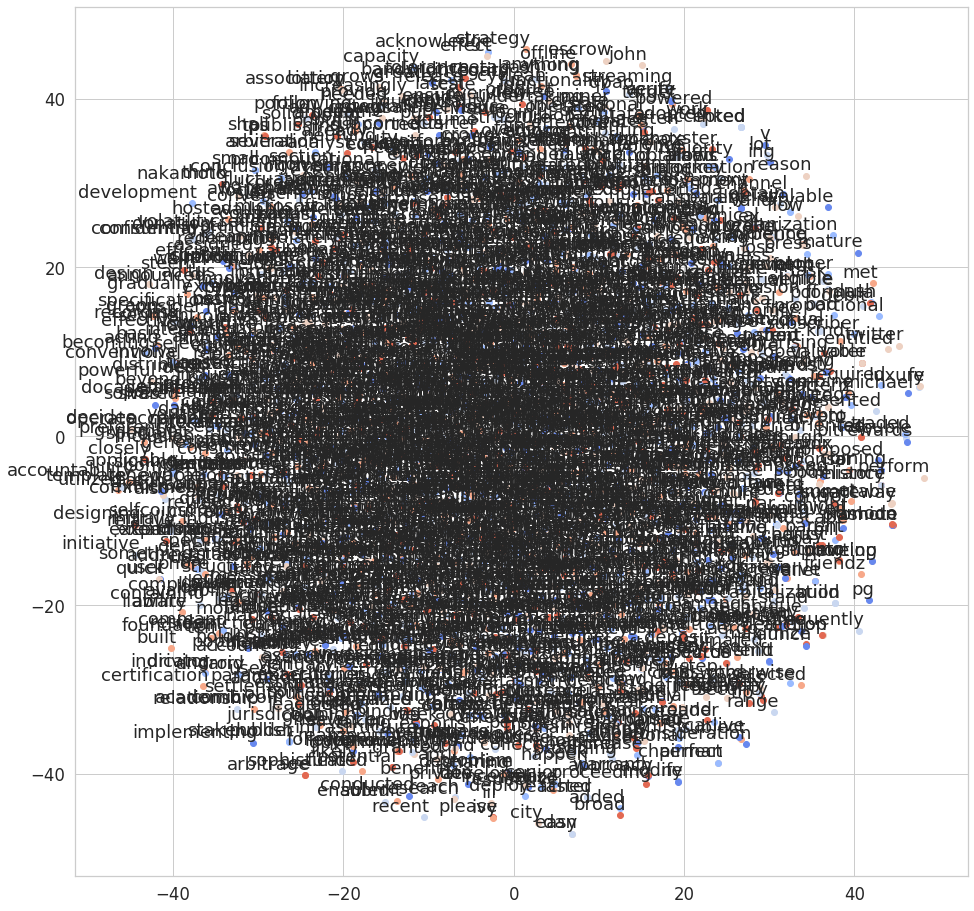

In [147]:
tsne_plot(model)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


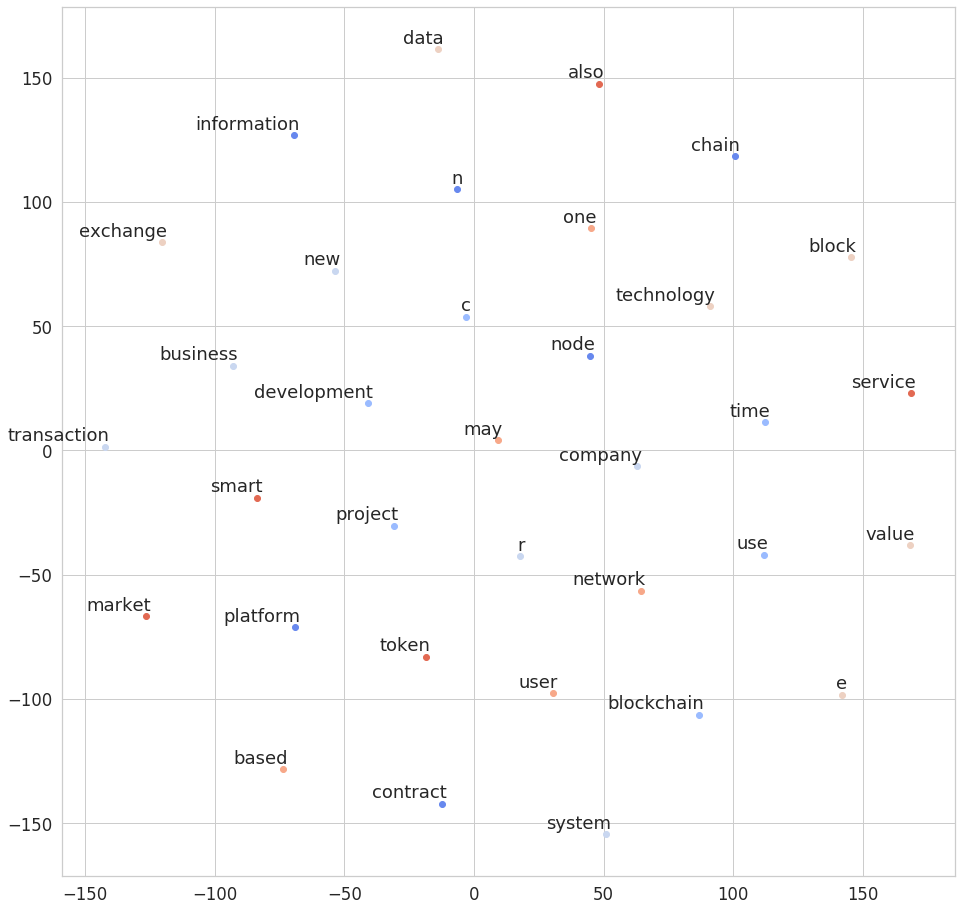

In [148]:
# A more selective model
model = Word2Vec(list_words,size=100, window=20, min_count=9000, workers=4)
tsne_plot(model)

In [149]:
model.corpus_count

884

In [0]:
from gensim.parsing.preprocessing import STOPWORDS

In [0]:
dictionary = gensim.corpora.Dictionary(data['text_corpus'])

In [152]:
#Filter out words that occur less than 50 whitepapers
dictionary.filter_extremes(no_below=200,no_above=0.6)
print('Total Vocabulary Size:', len(dictionary))

Total Vocabulary Size: 1157


In [153]:
#Transforming corpus into bag of words vectors

bow_corpus = [dictionary.doc2bow(doc) for doc in list_words]
print(bow_corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 4), (5, 1), (6, 33), (7, 1), (8, 1), (9, 2), (10, 1), (11, 2), (12, 1), (13, 3), (14, 1), (15, 1), (16, 1), (17, 1), (18, 4), (19, 1), (20, 3), (21, 1), (22, 2), (23, 1), (24, 1), (25, 3), (26, 1), (27, 4), (28, 1), (29, 1), (30, 1), (31, 1), (32, 2), (33, 1), (34, 10), (35, 26), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 2), (43, 17), (44, 4), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 3), (59, 1), (60, 1), (61, 1), (62, 1), (63, 4), (64, 1), (65, 1), (66, 3), (67, 2), (68, 5), (69, 2), (70, 2), (71, 1), (72, 3), (73, 3), (74, 2), (75, 3), (76, 1), (77, 7), (78, 1), (79, 1), (80, 3), (81, 1), (82, 1), (83, 3), (84, 4), (85, 1), (86, 1), (87, 4), (88, 1), (89, 1), (90, 2), (91, 4), (92, 1), (93, 2), (94, 2), (95, 2), (96, 2), (97, 1), (98, 3), (99, 1), (100, 2), (101, 2), (102, 1), (103, 3), (104, 2), (105, 2), (106, 2), (107, 1), (108, 2), (109, 2), (110

In [154]:
dictionary[300]

'check'

In [155]:
# Human readable format of corpus (term-frequency)
print([[(dictionary[id], freq) for id, freq in cp] for cp in bow_corpus[:1]])

[[('abstract', 1), ('accepted', 1), ('acquire', 1), ('across', 1), ('act', 4), ('action', 1), ('active', 33), ('added', 1), ('adding', 1), ('agreement', 2), ('along', 1), ('although', 2), ('always', 1), ('among', 3), ('analysis', 1), ('annual', 1), ('anyone', 1), ('apply', 1), ('approach', 4), ('architecture', 1), ('assumption', 3), ('attempt', 1), ('aware', 2), ('basis', 1), ('becomes', 1), ('begin', 3), ('beginning', 1), ('bound', 4), ('building', 1), ('called', 1), ('cash', 1), ('center', 1), ('chance', 2), ('changed', 1), ('chosen', 10), ('client', 26), ('collection', 1), ('communication', 1), ('computer', 1), ('computing', 1), ('con', 2), ('concept', 1), ('condition', 2), ('consensus', 17), ('consider', 4), ('considered', 2), ('consists', 1), ('constitute', 1), ('continue', 1), ('copy', 1), ('corresponding', 1), ('course', 1), ('cryptocurrencies', 1), ('dapp', 1), ('de', 1), ('decrease', 1), ('deep', 1), ('delivered', 2), ('delivery', 3), ('depends', 1), ('described', 1), ('despit

In [156]:
print('Total number of whitepapers:', len(bow_corpus))

Total number of whitepapers: 884


In [0]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = bow_corpus, id2word = dictionary, num_topics = 20, random_state =100, update_every = 1,
                                            chunksize=200,passes=10,alpha='auto',per_word_topics=True)

In [158]:
pprint(lda_model.print_topics())

[(0,
  '0.215*"n" + 0.207*"r" + 0.131*"l" + 0.116*"h" + 0.092*"p" + 0.065*"w" + '
  '0.061*"f" + 0.060*"g" + 0.031*"k" + 0.007*"x"'),
 (1,
  '0.036*"page" + 0.018*"org" + 0.016*"whitepaper" + 0.014*"social" + '
  '0.010*"web" + 0.009*"want" + 0.008*"release" + 0.007*"privacy" + '
  '0.007*"reserved" + 0.007*"q"'),
 (2,
  '0.057*"ico" + 0.052*"trading" + 0.026*"trade" + 0.020*"liquidity" + '
  '0.017*"eth" + 0.011*"btc" + 0.011*"buy" + 0.010*"usd" + 0.010*"volume" + '
  '0.008*"investor"'),
 (3,
  '0.049*"advertising" + 0.036*"ad" + 0.033*"video" + 0.031*"creator" + '
  '0.019*"revenue" + 0.015*"social" + 0.013*"quality" + 0.011*"view" + '
  '0.010*"audience" + 0.010*"site"'),
 (4,
  '0.035*"io" + 0.034*"card" + 0.025*"bank" + 0.024*"cryptocurrencies" + '
  '0.023*"fiat" + 0.011*"customer" + 0.010*"cash" + 0.010*"safe" + '
  '0.009*"banking" + 0.009*"erc"'),
 (5,
  '0.168*"energy" + 0.025*"production" + 0.016*"utility" + 0.011*"consumer" + '
  '0.011*"customer" + 0.010*"consumption" + 0

In [159]:
# Compute Perplexity
print('\nPerplexity:', lda_model.log_perplexity(bow_corpus))

# Compute Coherence Score
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts = list_words, dictionary = dictionary, coherence = 'c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score:', coherence_lda)


Perplexity: -6.5096077882303085

Coherence Score: 0.48351320949421267


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data['clean_text3'],data['price_drop_true'], test_size=0.2, random_state=100)

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [163]:
lm = LogisticRegression()
lm.fit(X_train, y_train)
score = lm.score(X_test, y_test)

print("Accuracy:", score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7796610169491526


In [0]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts= list_words, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [0]:
import tqdm

In [0]:
grid = {}
grid['Validation_Set'] = {}# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')# Validation sets
num_of_docs = len(bow_corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(bow_corpus, num_of_docs*0.75), 
               bow_corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=10)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

In [0]:
def evaluate_graph(dictionary, corpus, texts, limit):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        lm = LdaModel(corpus= bow_corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=list_words, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

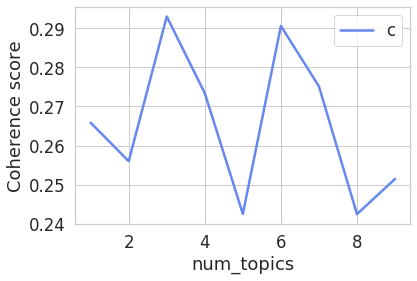

CPU times: user 7min 28s, sys: 112 ms, total: 7min 28s
Wall time: 7min 28s


In [167]:
%%time
lmlist, c_v = evaluate_graph(dictionary=dictionary, corpus=bow_corpus, texts=list_words, limit=10)

##LSI Model (Alternative form LSA model)

In [0]:
lsi_model = LsiModel(corpus = bow_corpus, num_topics = 5, id2word = dictionary)

In [169]:
lsi_model.show_topics(num_topics=10)

[(0,
  '0.593*"n" + 0.570*"r" + 0.329*"l" + 0.288*"h" + 0.245*"p" + 0.162*"f" + 0.158*"g" + 0.119*"w" + 0.078*"k" + 0.019*"x"'),
 (1,
  '0.374*"node" + 0.129*"consensus" + 0.118*"whitepaper" + 0.107*"foundation" + 0.098*"trading" + 0.097*"customer" + 0.092*"provider" + 0.090*"participant" + 0.090*"storage" + 0.090*"energy"'),
 (2,
  '0.726*"node" + 0.196*"consensus" + -0.158*"energy" + 0.125*"hash" + -0.117*"customer" + -0.112*"ico" + -0.110*"trading" + -0.093*"consumer" + -0.091*"investor" + 0.091*"signature"'),
 (3,
  '-0.923*"energy" + 0.145*"game" + -0.098*"node" + 0.075*"foundation" + -0.072*"customer" + -0.066*"production" + -0.063*"utility" + 0.062*"player" + 0.062*"advertising" + -0.058*"consumer"'),
 (4,
  '0.727*"game" + 0.303*"player" + -0.266*"credit" + 0.168*"miner" + 0.132*"energy" + -0.120*"customer" + 0.104*"video" + -0.100*"foundation" + -0.095*"institution" + 0.086*"mining"')]

In [0]:
import pyLDAvis
import pyLDAvis.gensim

In [173]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,bow_corpus,dictionary)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
10    -0.053511 -0.041970       1        1  8.967405
18    -0.029757  0.103267       2        1  8.347402
6     -0.080335 -0.121625       3        1  7.496229
19    -0.017862  0.148140       4        1  7.229423
8     -0.083115 -0.054908       5        1  6.659540
7     -0.070005 -0.068736       6        1  6.149187
17    -0.056273  0.060026       7        1  5.499928
2     -0.065406 -0.051041       8        1  5.453201
1     -0.066700 -0.010079       9        1  5.227256
13     0.057931  0.208027      10        1  5.147015
14    -0.083023 -0.072618      11        1  5.144735
0      0.554829 -0.145953      12        1  4.282443
12    -0.065481  0.025865      13        1  4.246504
4     -0.068664 -0.031164      14        1  4.089556
11    -0.035165  0.106056      15        1  3.617974
3     -0.048536 -0.030756      16        1  3.561189
9     -0.040591  0.058683      17        1  3.038966
16     0.348346  0.118068      18        1  2.399155
15    -0.050480 -0.100346      19        1  2.077038
5     -0.046203 -0.098935      20        1  1.365853, topic_info=     Category          Freq     Term         Total  loglift  logprob
144   Default  12167.000000        n  12167.000000  30.0000  30.0000
180   Default  11254.000000        r  11254.000000  29.0000  29.0000
421   Default   9372.000000        p   9372.000000  28.0000  28.0000
1112  Default   6906.000000        l   6906.000000  27.0000  27.0000
95    Default   6476.000000        h   6476.000000  26.0000  26.0000
...       ...           ...      ...           ...      ...      ...
35    Topic20     95.582428   client   3384.865234   0.7263  -5.1322
423   Topic20     75.532066    phase   1741.569824   1.1554  -5.3677
534   Topic20     80.718018  benefit   2327.706055   0.9317  -5.3012
1078  Topic20     73.841080   device   2582.414062   0.7388  -5.3903
239   Topic20     69.130615  storage   3034.769775   0.5115  -5.4562

[902 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
493       1  0.149410  accept
493       2  0.003370  accept
493       3  0.097735  accept
493       4  0.096611  accept
493       5  0.017974  accept
...     ...       ...     ...
492      14  0.061573    zero
492      15  0.025014    zero
492      16  0.002886    zero
492      18  0.002886    zero
492      20  0.046180    zero

[9026 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 19, 7, 20, 9, 8, 18, 3, 2, 14, 15, 1, 13, 5, 12, 4, 10, 17, 16, 6])

In [175]:
ldatopics = lda_model.show_topics(formatted=False)
ldatopics

[(5,
  [('energy', 0.16832408),
   ('production', 0.02469318),
   ('utility', 0.016178625),
   ('consumer', 0.01066304),
   ('customer', 0.010619781),
   ('consumption', 0.010217413),
   ('generation', 0.010094715),
   ('country', 0.008106358),
   ('home', 0.007592657),
   ('government', 0.00717758)]),
 (15,
  [('game', 0.15444879),
   ('player', 0.08000814),
   ('virtual', 0.034462497),
   ('win', 0.022172721),
   ('play', 0.01721367),
   ('video', 0.012778803),
   ('match', 0.00974709),
   ('item', 0.009313311),
   ('billion', 0.007170361),
   ('server', 0.0069444645)]),
 (0,
  [('n', 0.21494783),
   ('r', 0.206803),
   ('l', 0.13105239),
   ('h', 0.11640426),
   ('p', 0.09178096),
   ('w', 0.06483343),
   ('f', 0.061354768),
   ('g', 0.05977527),
   ('k', 0.030773606),
   ('x', 0.0072096884)]),
 (3,
  [('advertising', 0.048512027),
   ('ad', 0.036287468),
   ('video', 0.032557026),
   ('creator', 0.030816844),
   ('revenue', 0.019367807),
   ('social', 0.015284464),
   ('quality', 0

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(data['clean_text3']).toarray()
y = data['price_drop_true'].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [185]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [187]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 14  20]
 [ 35 108]]


In [188]:
print(f1_score(y_pred,y_test))

0.7970479704797048


In [189]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.41      0.29      0.34        49
           1       0.76      0.84      0.80       128

    accuracy                           0.69       177
   macro avg       0.58      0.56      0.57       177
weighted avg       0.66      0.69      0.67       177



In [190]:
mnb_auc = roc_auc_score(y_test , y_pred)
print('AUC: %.3f' % xgb_auc)

AUC: 0.808


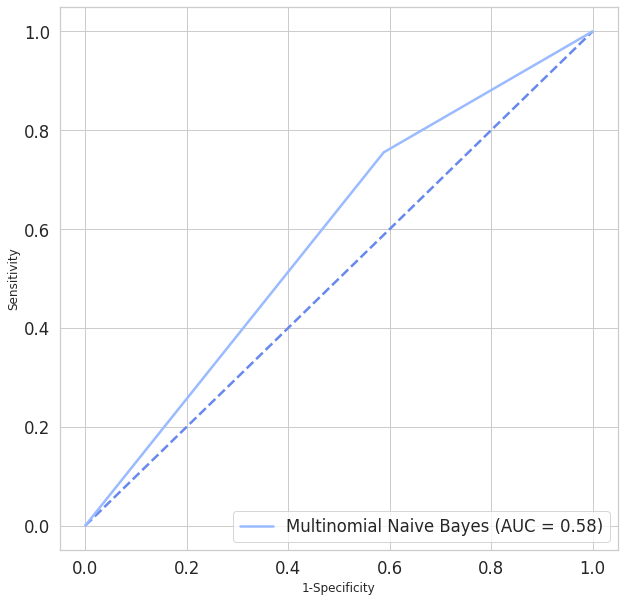

In [191]:
fpr, tpr , thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1],linestyle="--")
plt.plot(fpr,tpr, label='Multinomial Naive Bayes (AUC = %0.2f)'% mnb_auc)
plt.xlabel("1-Specificity",fontsize=12)
plt.ylabel("Sensitivity",fontsize=12)
plt.legend(loc='lower right')
plt.show()